In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2

In [2]:
mnist = fetch_openml('mnist_784')

In [72]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [73]:
# Convert to DataFrame
df = pd.DataFrame(data=mnist.data, columns=mnist.feature_names)
df['class'] = mnist.target.astype(int)

In [74]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [75]:
# Visualize the first few entries of the dataset
df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [76]:
# Familiarize yourself with the features and class variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int32(1), int64(784)
memory usage: 419.0 MB


In [77]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0,70000.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0,4.452429
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0,2.890195
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,2.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,4.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,7.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0,9.000000


In [78]:

# Drop the class variable from the data frame and save it in a different variable
X = df.drop('class', axis=1)
y = df['class']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=10)

In [80]:
X_train.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,56000.0,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,56000.0,56000.0,56000.0,56000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000093,0.000038,0.000015,0.000006,0.000006,5.474491e-07,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002785,0.001746,0.000993,0.000638,0.000723,1.295501e-04,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.131613,0.138920,0.106215,0.102829,0.134257,3.065715e-02,0.0,0.0,0.0,0.0


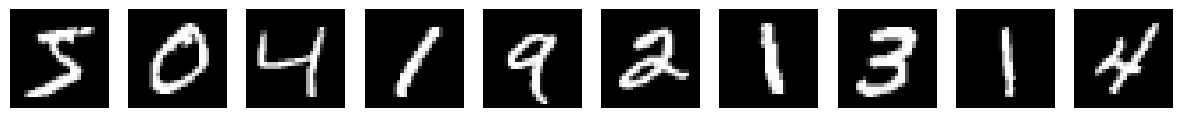

In [81]:
fig, axes = plt.subplots(1, 10, figsize=(15, 4))
for i in range(10):
    axes[i].imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    axes[i].axis('off')
plt.show()

C:\Users\atuls\AppData\Local\Temp\ipykernel_16992\1505049178.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=sns.color_palette("pastel"))


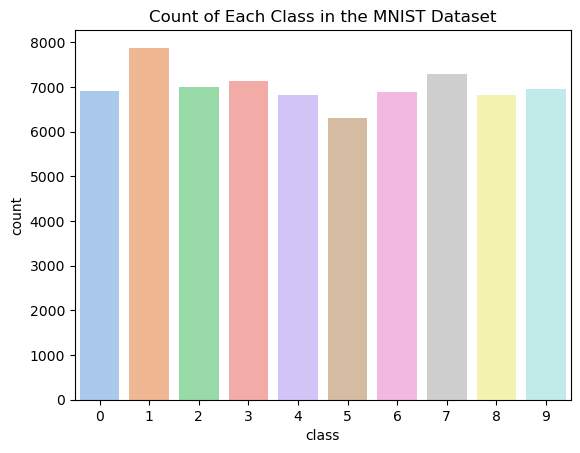

In [82]:
sns.countplot(x=y, palette=sns.color_palette("pastel"))
plt.title('Count of Each Class in the MNIST Dataset')
plt.show()

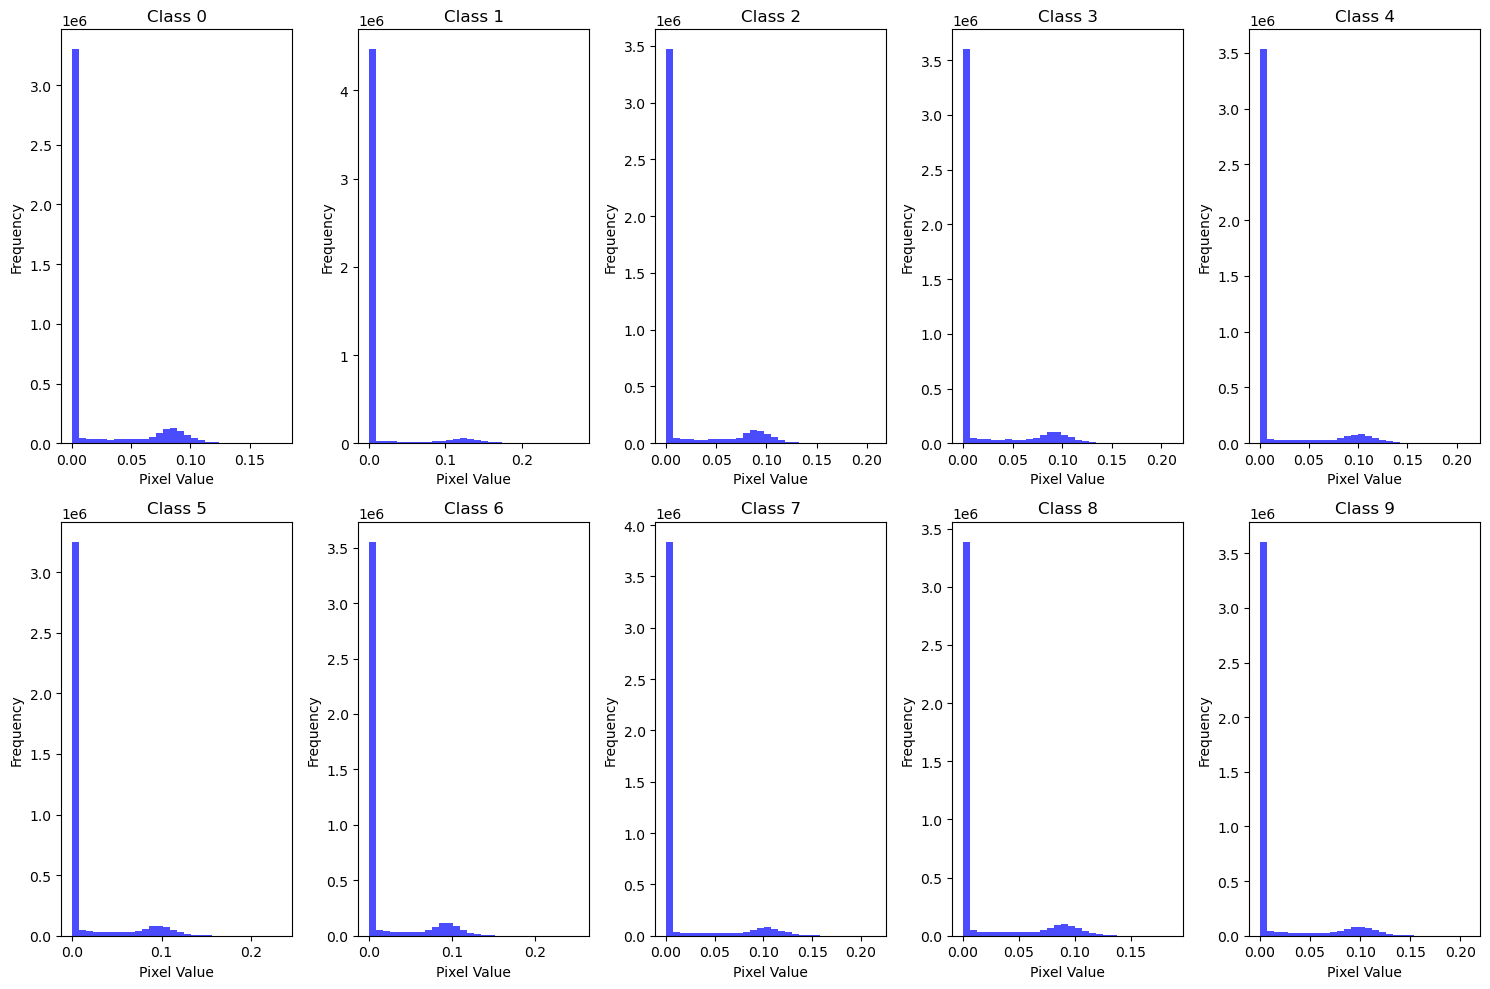

In [83]:
# Plot histograms for each class
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.ravel()

for i in range(10):
    class_data = X_train[y_train == i]
    axes[i].hist(class_data.values.flatten(), bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'Class {i}')
    axes[i].set_xlabel('Pixel Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

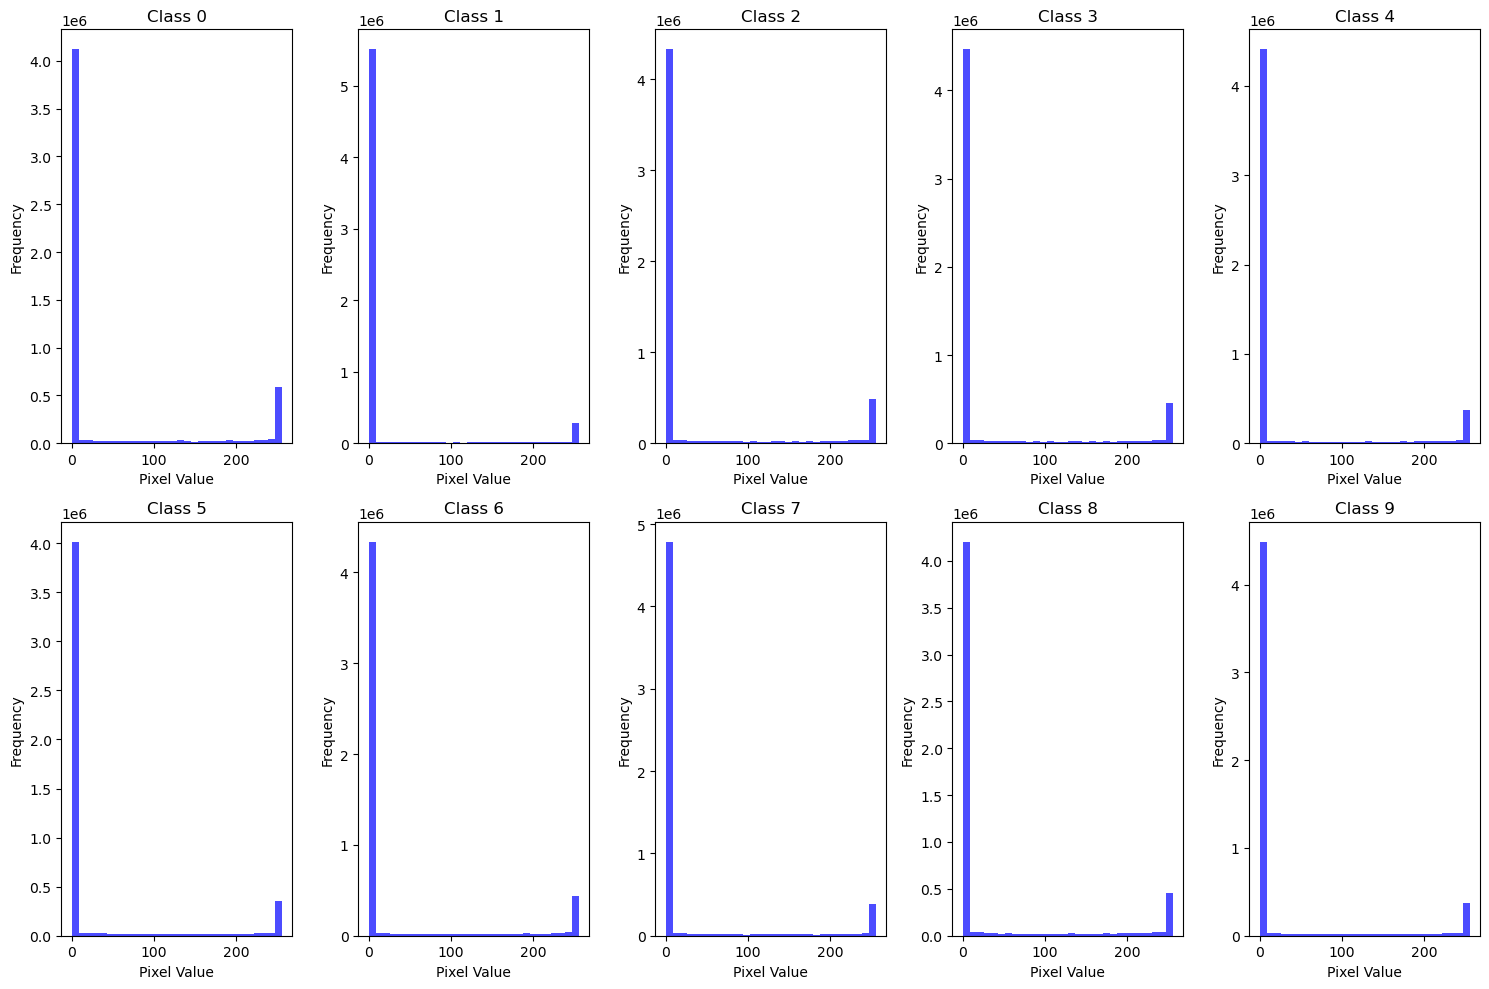

In [84]:
# Plot histograms for each class
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
axes = axes.ravel()

for i in range(10):
    class_data = X[y == i].values
    axes[i].hist(class_data.flatten(), bins=30, color='blue', alpha=0.7)
    axes[i].set_title(f'Class {i}')
    axes[i].set_xlabel('Pixel Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [113]:

def display_samples(df: pd.DataFrame, digits=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9], number_in_row=5, figsize=(10, 25), **imshow_kwargs):
    """
    Randomly picks digits from dataset and displays them.

    Keyword arguments:
    df -- consists of 'label' column and 784 columns from pixel0 to pixel783 
    digits -- digits to display, order matters
    number_in_row -- how many samples of each digit to display in a row
    figsize -- figure size, tuple (width, height) in inches
    imshow_kwargs -- keyword arguments of matplotlib.axes.Axes.imshow() except X 
    (cmap, norm, aspect, interpolation, etc) according to the definition
    https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.imshow.html#matplotlib.axes.Axes.imshow
    """
    # Randomly picks records
    picked_records = df[df['class'].isin(digits)].sample(frac=1).groupby('class').head(number_in_row)
    
    fig, axes = plt.subplots(len(digits), number_in_row, figsize=figsize)
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    
    for i in range(len(digits)):
        i_digit_records = picked_records[picked_records['class'] == digits[i]]
        
        # Converts rows of pixels into 28x28 matrices
        image_array = i_digit_records.iloc[:, 1:].values.reshape(number_in_row, 28, 28)
        
        for j in range(number_in_row):
            axes[i, j].imshow(
                image_array[j, :, :],
                cmap=imshow_kwargs.get('cmap', 'gray'),
                norm=imshow_kwargs.get('norm', None),
                aspect=imshow_kwargs.get('aspect', 'equal'),
                interpolation=imshow_kwargs.get('interpolation', 'nearest'),
                alpha=imshow_kwargs.get('alpha', None),
                vmin=imshow_kwargs.get('vmin', None),
                vmax=imshow_kwargs.get('vmax', None),
                origin=imshow_kwargs.get('origin', 'upper'),
                extent=imshow_kwargs.get('extent', None),
                filternorm=imshow_kwargs.get('filternorm', 1),
                filterrad=imshow_kwargs.get('filterrad', 4.0),
                resample=imshow_kwargs.get('resample', None),
                url=imshow_kwargs.get('url', None)
            )
            axes[i, j].axis('off')  # Hide axis

    plt.show()



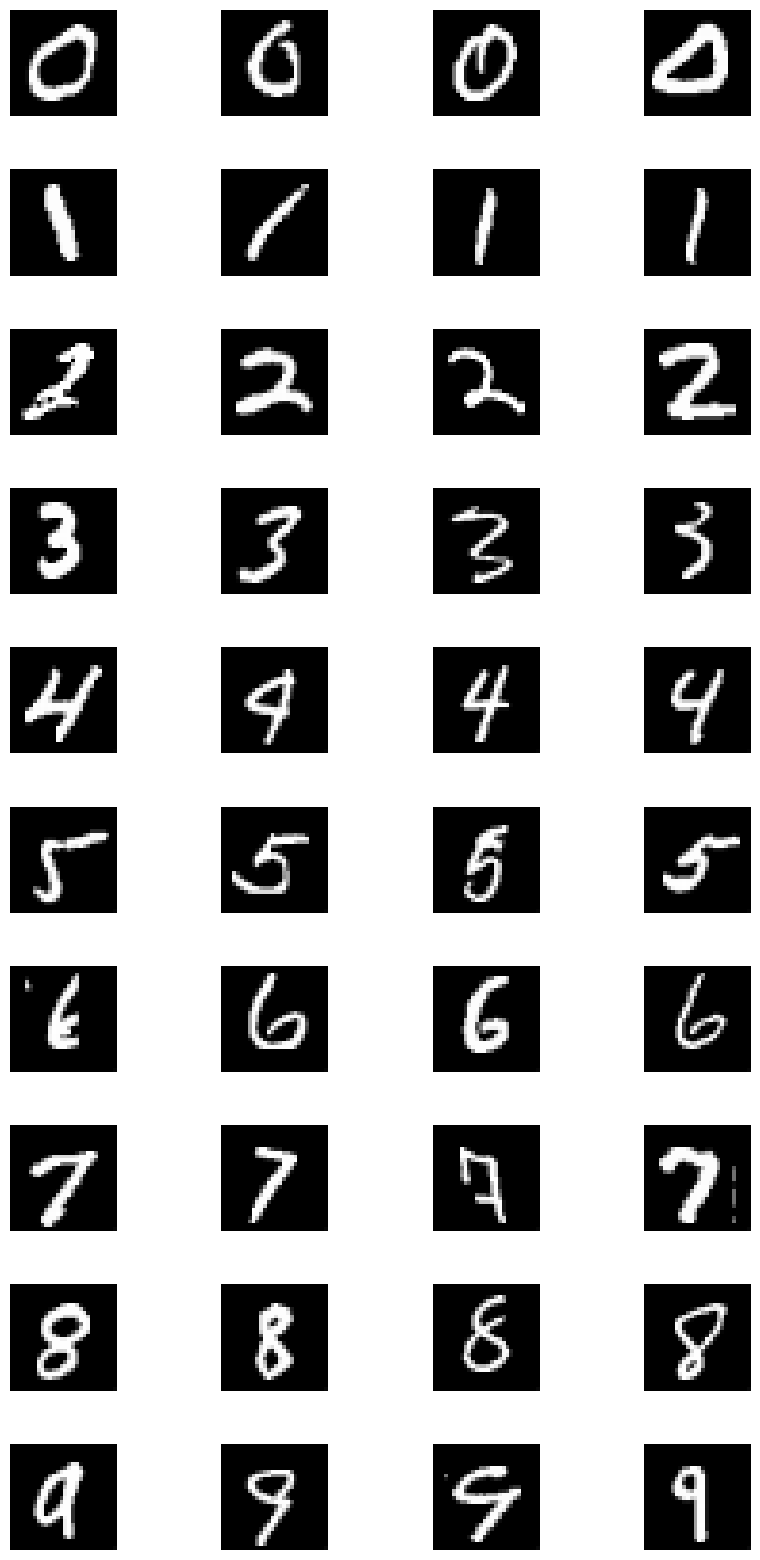

In [114]:
# In this call the function is set to display randomly picked samples:
# of these digits: 0,1,2,3,4,5,6,7,8,9
# 4 times in a row for each digit 
# in figure with 10 inch width and 12 inch height 
# as grayscale images"
display_samples(df, [0,1,2,3,4,5,6,7,8,9], 4, figsize=(10,20), cmap='gray', vmin=0, vmax=255)